# Tutorial 04 : Correction des Exercices Pandas

In [1]:
import pandas as pd

from IPython.display import display
from urllib.parse import quote

# Chargement des données

`Pandas` est une librairie qui permet de traiter des données tabulaires.

Elle comporte deux types d'objets, les `Series` qui correspondent à des colonnes et des `Dataframes` qui correspondent à des colonnes mises en tableau.

`Pandas` permet de directement lire les fichier `csv` à l'aide de la fonction `pd.read_csv`.

In [2]:
data_bottin = pd.read_csv('./Datasets/bottin_test_data.zip')

Nous pouvons maintenant observer les données à l'aide de la fonction `.head`.

Pour conclure cette introduction, nous allons maintenant sélectionner au hasard 10 entrées (à l'aide de `.sample`) et utiliser la fonction helper `add_clickable_url` qui permet de rajouter une colonne `url` à notre dataframe qui donne un lien vers la page du bottin.

# Tâches

## Tâche 1

Le but de cette tâche est de calculer quelques statistiques de bases. Il faut trouver:

1. Le nombre d'entrées
2. Le nombre d'entrées par année (indice, utilisez `.groupby` et `.size`)
3. Le nombre de noms uniques (indice, utilisez `.unique`)
4. Le nombre de métiers uniques
5. Le nombre de rues uniques

Puis quelques graphes à réaliser (c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)):
1. Le graphe du nombre d'entrées par années
2. L'histogramme (c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)) du nombre de doublons de noms (en x vous aurez le nombre de doublons et en y la fréquence), indice, utilisez `.value_counts` et si vous ne voyez rien sur votre histogramme, les options `loglog` et `bins` de `.hist`.
3. Le même histogramme que précédemment, mais pour les métiers.

In [3]:
entries_number = data_bottin.shape[0]
entries_per_year = data_bottin.groupby('year').size()
unique_names_number = data_bottin['name'].unique().size
unique_jobs_number = data_bottin['job'].unique().size 
unique_streets_number = data_bottin['street'].unique().size 

print(f"Il y {entries_number} entrées, dont {unique_names_number} noms uniques, {unique_jobs_number} métiers uniques, {unique_streets_number} rues uniques.")
print("\nLa distribution d'entrées par année est la suivante:")
print("\n".join([f"{year}: {count}" for year, count in entries_per_year.reset_index().values]))

Il y 617236 entrées, dont 269593 noms uniques, 60784 métiers uniques, 39916 rues uniques.

La distribution d'entrées par année est la suivante:
1901: 122529
1907: 121765
1914: 123464
1921: 118520
1922: 130958


Pour les graphes, il suffit de transformer votre dataframe dans le bon format (en utilisant `.groupby`, `.size` et `.value_counts`), puis d'utiliser `.plot` ou `.hist` avec les bonnes options.

Text(0, 0.5, 'Number of entries')

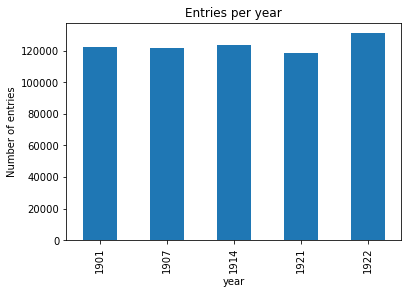

In [4]:
data_bottin.groupby('year').size().plot(kind='bar', title='Entries per year').set_ylabel('Number of entries')

Text(0.5, 0, 'Number of duplicates')

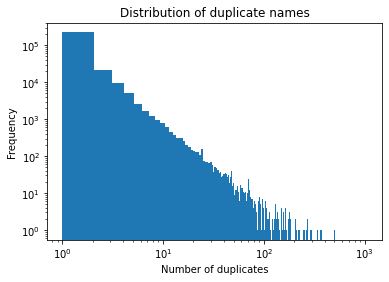

In [5]:
data_bottin['name'].value_counts().plot(kind='hist',loglog=True, bins=1000,
       title='Distribution of duplicate names').set_xlabel('Number of duplicates')

Text(0.5, 0, 'Number of duplicates')

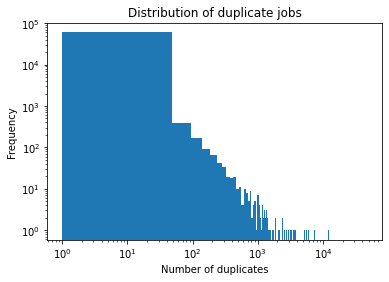

In [6]:
data_bottin['job'].value_counts().plot(kind='hist',loglog=True, bins=1000,
       title='Distribution of duplicate jobs').set_xlabel('Number of duplicates')

## Tâche 2

Le but de cette tâche est d'extraire les entrées avec un seul mot ou un seul mot et du contenu entre parenthèse dans `name` (ignorer les espaces avant et après).

Pour cette tâche, il vous suffira d'écrire une seule expression régulière, ce [lien](https://regex101.com/r/Ccyja3/1/tests) vous permettra de tester votre expression régulière.

Pour pouvoir extraire les lignes correspondantes, vous pouvez indexer les données avec le prédicat qui vous est retourné par `['name'].str.match`, c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html?highlight=str%20match#pandas.Series.str.match).

In [7]:
regex_one_word = '^\s*\w+(?:\s?\(.*\)\s*)?\s*$'

predicate_one_word = data_bottin['name'].str.match(regex_one_word)
data_bottin_one_word = data_bottin.loc[predicate_one_word].copy()

display(data_bottin_one_word)

,directory,page,row,year,name,job,street,number,street_clean,street_only
0,bpt6k97631451,644,2,1901,Aarault,vins et hôtel,r. St-Honoré,312.,rue Saint-Honoré,Saint-Honoré
1,bpt6k97631451,644,3,1901,Aaron,march. de chevaux,r. Bouret,39,rue Bouret,Bouret
2,bpt6k97631451,644,7,1901,Aaron,fantaisies pour modes,quai Jemmapes,56.,quai Jemmapes,Jemmapes
3,bpt6k97631451,644,9,1901,Aaron (Emile et Edouard),négociants,cour et pass. des Petites-Écuries,20.,courue et passage des Petites-Écuries,cous Petites-Écuries
5,bpt6k97631451,644,12,1901,Abadie (Ch. Vallois succcess.),fabr. de billards,r. du Grand-Prieuré,8.,rue du Grand-Prieuré,Grand-Prieuré
...,...,...,...,...,...,...,...,...,...,...
617230,bpt6k9780089g,1607,256,1922,Zwinger (E.),commiss. en march,r. Saulnier,7.,rue Saulnier,Saulnier
617232,bpt6k9780089g,1607,259,1922,Zygomalas,perles fausses,r. de Constantinople,28.,rue de Constantinople,Constantinople
617233,bpt6k9780089g,1607,261,1922,Zysapel,restaurant,r. des Ecouffes,14.,rue des Ecouffes,s Ecouffes
617234,bpt6k9780089g,1607,263,1922,Zyssmann,bar,r. de Pivoli,40.,rue de Pivoli,Pivoli


## Tâche 3

Le but de cette tâche est d'extraire le compte de chaque mot dans le texte entre parenthèse dans `name`.

La première étape est d'extraire de le texte entre parenthèses, il existe une fonction dans `.str` pour faire ça : à vous de la trouver. N'oubliez pas de supprimer les entrées sans parenthèse, par exemple avec `.dropna()` et d'indexer pour obtenir une série.

In [8]:
regex_parens = '^.*?\((.*)\).*?$'

name_parens = data_bottin['name'].str.extract(regex_parens).dropna()[0]

display(name_parens)

3              Emile et Edouard
5         Ch. Vallois succcess.
6                           Mme
12                           A.
13                   Charles d'
                  ...          
617227                       F.
617229                    Henri
617230                       E.
617231                      Ch.
617235                  Jacques
Name: 0, Length: 238405, dtype: object

Le but de l'étape suivante est de séparer chaque entrée en mots, puis de les compter.

Il existe une fonction dans `.str` pour séparer en mots. La manière la plus simple est de séparer sur l'espace, mais on peut aller plus loin, à vous de choisir.
Pour compter les mots, il faudra retourner dans du python plus traditionnel et donc itérer sur chaque entrée.

Une manière élégante de compter est d'utiliser l'objet `Counter` de `collections`, c.f. la [doc](https://docs.python.org/3.8/library/collections.html#collections.Counter).

In [9]:
# On importe l'objet Counter
from collections import Counter

name_parens_split = name_parens.str.split('\W')
name_parens_split = name_parens_split.apply(lambda words: [word for word in words if len(word) > 0])

word_counts = Counter()

for words in name_parens_split.values:
    word_counts.update(words)
    
word_counts.most_common(5)

[('Mme', 35434), ('A', 26038), ('J', 13684), ('E', 13459), ('L', 11975)]

## Tâche 4

Le but de cette tâche est d'extraire le compte des mots dans les entrées ne matchant pas les résultats de la tâche 1.

Il suffit d'adopter une marche à suivre similare à la tâche précédente.

In [10]:
name_one_word_split = data_bottin.loc[~predicate_one_word]['name'].str.split('\W')
name_one_word_split = name_one_word_split.apply(lambda words: [word for word in words if len(word) > 0])

word_counts = Counter()

for words in name_one_word_split.values:
    word_counts.update(words)
word_counts.most_common(5)

[('et', 29457), ('Cie', 10409), ('de', 6668), ('fils', 5747), ('A', 4734)]

## Tâche 5

Le but de cette tâche est de grouper les métiers par `name`, `job`, `street` et `number`, puis d'afficher la distribution sous la forme d'une `Dataframe`.

Cela peut-être réalisé en une seule ligne, en n'utilisant que des fonctions `pandas`.

In [11]:
# Ici, le backslash permet de continuer la ligne plus bas ; pratique pour des instructions trop longues.


data_bottin\
    .groupby(['name', 'job', 'street', 'number'])\
    .size()\
    .sort_values(ascending=False)\
    .value_counts()\
    .to_frame('Count')\
    .rename_axis('Number of duplicates')

,Count
Number of duplicates,
1,408887
2,67471
3,17842
4,3262
5,794


Il est possible d'aller un petit peu plus loin en utilisant `street_only` et en nettoyant un peu les nombres, par exemple en ne prenant que le premier chiffre et bis. C.f. les tâches précédentes pour l'extraction

In [12]:
data_bottin['number_clean'] = data_bottin['number'].str.extract('(^\d+(?: ?bis)?).*')

data_bottin\
 .groupby(['name', 'job', 'street_only', 'number_clean'])\
 .size()\
 .sort_values(ascending=False)\
 .value_counts()\
 .to_frame('Count')\
 .rename_axis('Number of duplicates')

,Count
Number of duplicates,
1,381464
2,73914
3,20401
4,3864
5,1008
